In [138]:
import tensorflow as tf
import datetime
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
# import accuracy_score 


In [139]:


num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [140]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])


In [141]:
model = create_model()
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 512)               401920    
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dense_71 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [142]:
# m = tf.keras.metrics.AUC()
# m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
# print('Intermediate result:', float(m.result()))

# m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
# print('Final result:', float(m.result()))

In [143]:
model = create_model()
model.compile(optimizer="adam", loss='mean_squared_error', metrics=["accuracy"])

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 512)               401920    
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_73 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [144]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09172151982784271
Test accuracy: 0.06870000064373016


In [145]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_41 (Dropout)        (None, 1600)            

In [146]:
# batch_size = 128
# epochs = 3

# model.compile(  
#     loss='mean_squared_error', 
#     optimizer="adam", 
#     metrics=[metrics.MeanSquaredError()]
# )

# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [147]:
tf.keras.metrics.Accuracy(name="accuracy", dtype=None)

model.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Accuracy()])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 16s 37ms/step - loss: 0.0905 - accuracy: 0.0000e+00 - val_loss: 0.0900 - val_accuracy: 0.0000e+00
Epoch 2/3
422/422 [==============================] - 16s 38ms/step - loss: 0.0901 - accuracy: 0.0000e+00 - val_loss: 0.0897 - val_accuracy: 0.0000e+00
Epoch 3/3
422/422 [==============================] - 16s 37ms/step - loss: 0.0898 - accuracy: 0.0000e+00 - val_loss: 0.0894 - val_accuracy: 0.0000e+00


Epoch 1/3
422/422 [==============================] - 16s 37ms/step - loss: 0.0664 - accuracy: 0.0000e+00 - val_loss: 0.0584 - val_accuracy: 0.0000e+00
Epoch 2/3
422/422 [==============================] - 15s 36ms/step - loss: 0.0624 - accuracy: 0.0000e+00 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 3/3
422/422 [==============================] - 16s 37ms/step - loss: 0.0588 - accuracy: 0.0000e+00 - val_loss: 0.0484 - val_accuracy: 0.0000e+00


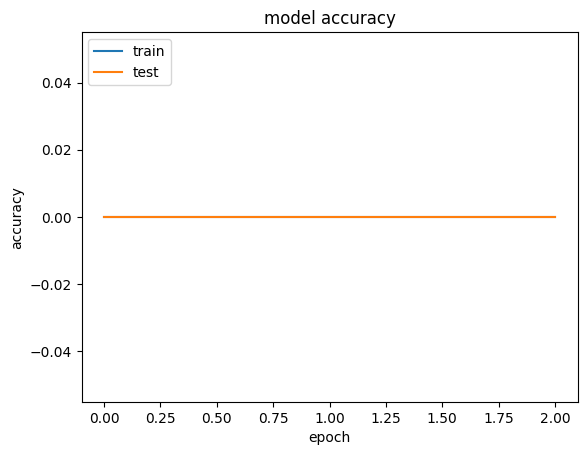

In [150]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [149]:
tf.keras.metrics.Accuracy(name="accuracy", dtype=None)

model.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Accuracy()])

model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0895 - accuracy: 0.0000e+00 - val_loss: 0.0891 - val_accuracy: 0.0000e+00
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0892 - accuracy: 0.0000e+00 - val_loss: 0.0887 - val_accuracy: 0.0000e+00
Epoch 3/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0888 - accuracy: 0.0000e+00 - val_loss: 0.0884 - val_accuracy: 0.0000e+00
Epoch 4/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0885 - accuracy: 0.0000e+00 - val_loss: 0.0880 - val_accuracy: 0.0000e+00
Epoch 5/15
422/422 [==============================] - 15s 37ms/step - loss: 0.0881 - accuracy: 0.0000e+00 - val_loss: 0.0875 - val_accuracy: 0.0000e+00
Epoch 6/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0876 - accuracy: 0.0000e+00 - val_loss: 0.0869 - val_accuracy: 0.0000e+00
Epoch 7/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0870 - acc

In [152]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0471 - accuracy: 0.0000e+00 - val_loss: 0.0343 - val_accuracy: 0.0000e+00
Epoch 2/15
245/422 [================>.............] - ETA: 6s - loss: 0.0453 - accuracy: 0.0000e+00